## LAB-4 EX-2
## 200968266
## ANKITA VEERABAHU

# ML Lab for Fuel Consumption Dataset  
  
**DATA:** The dataset contains  model-specific fuel consumption ratings and estimated carbon dioxide emissions.  
The total number of instances is 1067 and the number of attributes is 13.  
  
**1. Modelyear:** Year the model of vehicle was released.  
**2. Make:** The make of vehicle  
**3. Model:** The model of vehicle  
**4. Vehicleclass:** The class of vehicle  
**5. Engine size:** The size of engine  
**6. Cylinders:** The number of cylinders  
**7. Transmission:** The type of transmission eg. M6, AV7.  
**8. Fueltype:** The type of fuel  
**9. Fuelconsumption_city:** The fuel consumption of vehicle in the city  
**10. Fuelconsumption_hwy:** The fuel consumption of vehicle in the highway  
**11. Fuelconsumption_comb:** The combined fuel consumption  
**12. Fuelconsumption_comb_mpg:** The combined fuel consumption in miles per gallon  
**13. CO2Emissions:** The CO2 Emissions of vehicle  



  


In [24]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
#Importing libraries from sklearn
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report,mean_absolute_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [26]:
#Reading required csv file
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [27]:
#Information about dataset
print("The information about the dataset is as follows: ")
df.info()

The information about the dataset is as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4)

In [28]:
#Count of missing values
print("The total number of missing values in the data is as follows: ")
df.isna().sum()

The total number of missing values in the data is as follows: 


MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

There are no missing values in the data.

In [29]:
#Describing numeric attributes
print("The 5 - Number summary of the numeric attributes is as follows: ")
df.drop(['MODELYEAR'], axis = 1).describe()

The 5 - Number summary of the numeric attributes is as follows: 


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [30]:
#Correlation matrix
print("The correlation matrix for the dataset is as follows: ")
c=df.drop(['MODELYEAR'], axis = 1).corr()
c

The correlation matrix for the dataset is as follows: 


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


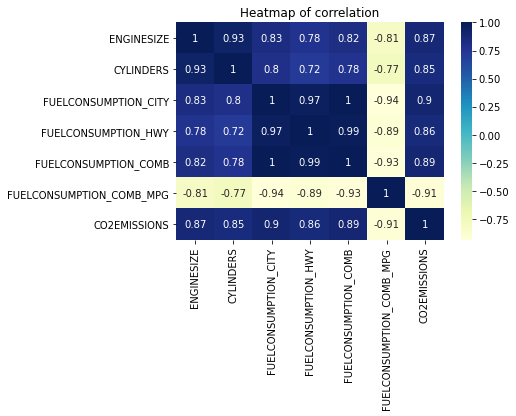

In [31]:
#Visualization of correlation matrix
sns.heatmap(c, annot = True, cmap ='YlGnBu' )
plt.title('Heatmap of correlation')
plt.show()

There exists strong correlation ( r = 0.97) between fuelconsumption_city and fuelconsumption_hwy.  
All the attributes are strongly correlated with CO2Emissions (r > 0.85), but the 3 strongest among them are Fuelconsumption_comb_mpg (r = -0.91), Fuelconsumption_city (r = 0.9) and Fuelconsumption_comb (r = 0.89).   

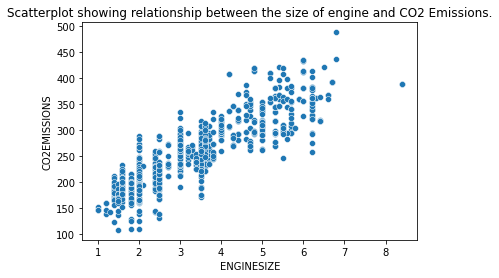

In [32]:
#Visualization of Engine size vs CO2 Emissions
sns.scatterplot(data =df, x = 'ENGINESIZE', y = 'CO2EMISSIONS', palette= 'YlGnBu')
plt.title("Scatterplot showing relationship between the size of engine and CO2 Emissions.")
plt.show()

There exists a strong positive correlation between engine size and CO2 Emissions, i.e., as engine size increases, the amount of CO2 Emissions increases.  

In [33]:
#Defining our independent and dependent variables (X and Y) respectively
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
Y = df['CO2EMISSIONS']

In [34]:
#Transforming independent variables into a polynomial of cubic degree (degree = 3)
poly = PolynomialFeatures(degree=3)
X = poly.fit_transform(X)

In [35]:
#Splitting into training and testing set
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=1)

In [36]:
#Defining the polynomial regression model
lr = LinearRegression()
#Fitting the model
lr.fit(X_train, Y_train)

LinearRegression()

In [37]:
#Using model for prediction
pred = lr.predict(X_test)

In [38]:
#Calculating Mean Absolute Error
print("The Mean absolute Error of model is ", mean_absolute_error(Y_test, pred))

The Mean absolute Error of model is  10.969589214451728


In [39]:
#Calculating R2 score
print("The R2 score of model is ", r2_score(Y_test, pred))

The R2 score of model is  0.9248559119977461


In [41]:
#Calculating Residual Sum of Squares
print("The Residual Sum of Squares of model is ", np.sum(np.square(pred - Y_test)))

The Residual Sum of Squares of model is  102524.45311718895


The R2 score of model is 0.92. This is quite high. This implies that the model is fairly accurate for degree 3.  